<a href="https://colab.research.google.com/github/Shereen74/graduation_project/blob/main/PredictingEnergyConsumption_GP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%cd /content/drive/MyDrive/GP

/content/drive/MyDrive/GP


In [5]:
!pwd

/content/drive/MyDrive/GP


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

weather_data = pd.read_csv('./ashrae-energy-prediction/weather_train.csv')
building_data = pd.read_csv('./ashrae-energy-prediction/building_metadata.csv')

In [7]:
counter = 0
batch_size = 1000000
train_data = []
for chunk in pd.read_csv('./ashrae-energy-prediction/train.csv', chunksize=batch_size):

    train_data.append(chunk)
    counter += 1

train_data

[        building_id  meter            timestamp  meter_reading
 0                 0      0  2016-01-01 00:00:00         0.0000
 1                 1      0  2016-01-01 00:00:00         0.0000
 2                 2      0  2016-01-01 00:00:00         0.0000
 3                 3      0  2016-01-01 00:00:00         0.0000
 4                 4      0  2016-01-01 00:00:00         0.0000
 ...             ...    ...                  ...            ...
 999995         1244      1  2016-01-19 03:00:00        22.9297
 999996         1244      3  2016-01-19 03:00:00      1050.9600
 999997         1245      0  2016-01-19 03:00:00        65.6562
 999998         1245      1  2016-01-19 03:00:00         0.0000
 999999         1245      2  2016-01-19 03:00:00       867.3520
 
 [1000000 rows x 4 columns],
          building_id  meter            timestamp  meter_reading
 1000000         1246      0  2016-01-19 03:00:00        49.0000
 1000001         1246      1  2016-01-19 03:00:00         0.0000
 10000

In [8]:
Train_Data = pd.concat(train_data)
Train_Data.shape

(20216100, 4)

In [9]:
Train_Data.tail()

,building_id,meter,timestamp,meter_reading
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575
20216099,1448,0,2016-12-31 23:00:00,2.850


In [10]:
weather_data.tail()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6
139772,15,2016-12-31 23:00:00,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8


## Data Preprocessing

In [11]:
#Merging train data
train = Train_Data.merge(building_data, on='building_id', how='left')
train = train.merge(weather_data, on=['site_id', 'timestamp'], how='left')
train.tail(25)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
20216075,1431,0,2016-12-31 23:00:00,87.9500,15,Public services,111360,2000.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216076,1431,2,2016-12-31 23:00:00,426.3400,15,Public services,111360,2000.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216077,1432,0,2016-12-31 23:00:00,403.4500,15,Education,160673,1968.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216078,1433,0,2016-12-31 23:00:00,41.3500,15,Education,28084,1913.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216079,1433,2,2016-12-31 23:00:00,3173.8800,15,Education,28084,1913.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216080,1434,0,2016-12-31 23:00:00,70.7250,15,Education,33148,1967.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216081,1434,2,2016-12-31 23:00:00,259.0730,15,Education,33148,1967.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216082,1435,0,2016-12-31 23:00:00,4.7250,15,Education,9552,1961.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216083,1436,0,2016-12-31 23:00:00,11.6000,15,Manufacturing/industrial,11302,1937.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216084,1436,2,2016-12-31 23:00:00,1274.6600,15,Manufacturing/industrial,11302,1937.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8


In [12]:
# Select the rows that match the desired criteria
mask = (train['site_id'] == 0) & (train['meter'] == 0)

# Update the values in the "meter_reading" column for the selected rows
train.loc[mask, 'meter_reading'] *= 0.2931

In [13]:
train.describe()

,building_id,meter,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,8.088455e+06,3.506933e+06,2.011944e+07,1.139074e+07,2.011596e+07,1.646708e+07,1.898443e+07,1.876705e+07,2.007242e+07
mean,7.992780e+02,6.624412e-01,2.109925e+03,7.992232e+00,1.077830e+05,1.968277e+03,4.184848e+00,1.598795e+01,1.900423e+00,7.747429e+00,7.964155e-01,1.016085e+03,1.730151e+02,3.377525e+00
std,4.269133e+02,9.309921e-01,1.532357e+05,5.099060e+00,1.171424e+05,3.020815e+01,4.008277e+00,1.094729e+01,2.402909e+00,1.017867e+01,7.468997e+00,7.060539e+00,1.140574e+02,2.265694e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.830000e+02,1.900000e+03,1.000000e+00,-2.890000e+01,0.000000e+00,-3.500000e+01,-1.000000e+00,9.682000e+02,0.000000e+00,0.000000e+00
25%,3.930000e+02,0.000000e+00,1.797590e+01,3.000000e+00,3.252700e+04,1.951000e+03,1.000000e+00,8.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.011600e+03,7.000000e+01,2.100000e+00
50%,8.950000e+02,0.000000e+00,7.509000e+01,9.000000e+00,7.270900e+04,1.969000e+03,3.000000e+00,1.670000e+01,0.000000e+00,8.900000e+00,0.000000e+00,1.016000e+03,1.800000e+02,3.100000e+00
75%,1.179000e+03,1.000000e+00,2.526000e+02,1.300000e+01,1.391130e+05,1.993000e+03,6.000000e+00,2.410000e+01,4.000000e+00,1.610000e+01,0.000000e+00,1.020500e+03,2.800000e+02,4.600000e+00
max,1.448000e+03,3.000000e+00,2.190470e+07,1.500000e+01,8.750000e+05,2.017000e+03,2.600000e+01,4.720000e+01,9.000000e+00,2.610000e+01,3.430000e+02,1.045500e+03,3.600000e+02,1.900000e+01


In [14]:
100 * (train.isnull().sum() / len(train))

building_id            0.000000
meter                  0.000000
timestamp              0.000000
meter_reading          0.000000
site_id                0.000000
primary_use            0.000000
square_feet            0.000000
year_built            59.990033
floor_count           82.652772
air_temperature        0.478124
cloud_coverage        43.655131
dew_temperature        0.495348
precip_depth_1_hr     18.544739
sea_level_pressure     6.092515
wind_direction         7.167792
wind_speed             0.710701
dtype: float64

In [15]:
#Dropping unused columns in test1 (decreasing null values)
train = train.drop(columns=['year_built', 'floor_count', 'wind_direction', 'dew_temperature'])

In [16]:
#Replace Null values
#train_x['precip_depth_1_hr'].fillna(method='ffill', inplace = True)
#train_x['cloud_coverage'].fillna(method='bfill', inplace = True)
train['air_temperature'].fillna(train['air_temperature'].mean(), inplace = True)
train['cloud_coverage'].fillna(train['cloud_coverage'].mean(), inplace = True)
train['precip_depth_1_hr'].fillna(train['precip_depth_1_hr'].mean(), inplace = True)
train['sea_level_pressure'].fillna(train['sea_level_pressure'].mean(), inplace = True)
train['wind_speed'].fillna(train['wind_speed'].mean(), inplace = True)

100 * (train.isnull().sum() / len(train))

building_id           0.0
meter                 0.0
timestamp             0.0
meter_reading         0.0
site_id               0.0
primary_use           0.0
square_feet           0.0
air_temperature       0.0
cloud_coverage        0.0
precip_depth_1_hr     0.0
sea_level_pressure    0.0
wind_speed            0.0
dtype: float64

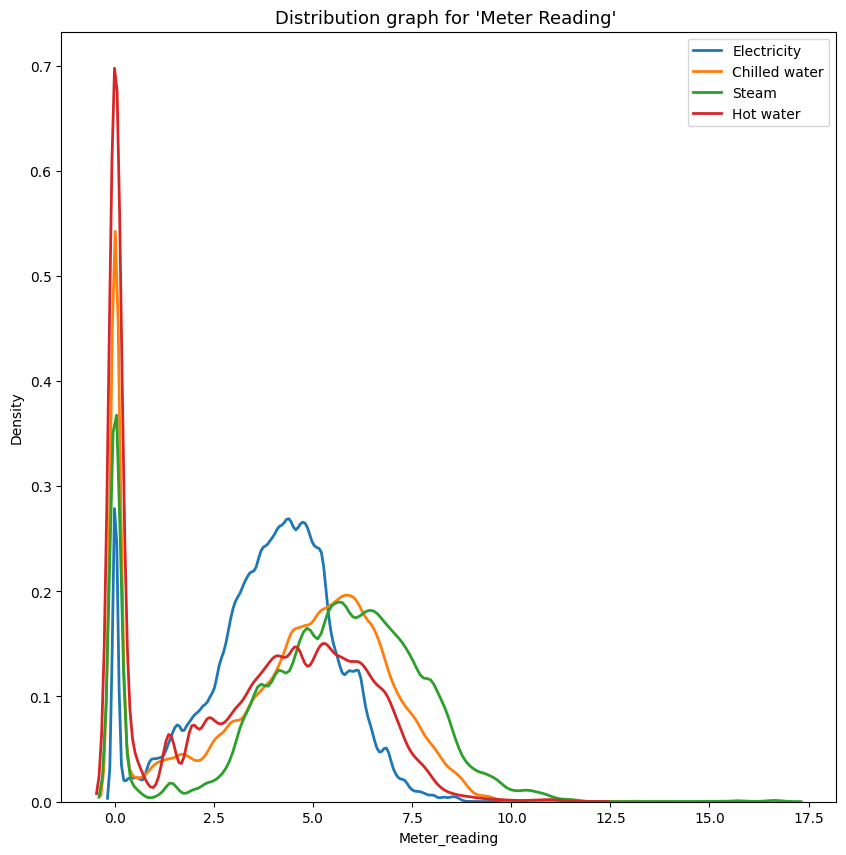

In [17]:
#Displaying distribution of the meter reading in meters without zeros
#Used log transformation to avoid the skewness of the meter reading
plt.figure(figsize=(10, 10))

#Different meter types [0, 1, 2, 3]
meterTypes = sorted(train['meter'].unique().tolist())

#Plotting 'meter_reading' distribution for each meter
for meter_type in meterTypes:
    subset = train[train['meter'] == meter_type]
    sns.kdeplot(np.log1p(subset["meter_reading"]), #estimates the density of a variable
                label = meter_type, linewidth = 2)  #and creates a smooth curve that represents the probability density of the data.

#Setting figure information (label, title, legend)
plt.ylabel("Density")
plt.xlabel("Meter_reading")
plt.title("Distribution graph for 'Meter Reading' ", size=13)
plt.legend(['Electricity', 'Chilled water', 'Steam', 'Hot water'])

In [18]:
train["primary_use"].value_counts()

Education                        8165504
Office                           4394864
Entertainment/public assembly    2264917
Lodging/residential              2146413
Public services                  1662826
Healthcare                        398527
Other                             242222
Parking                           213796
Manufacturing/industrial          125713
Food sales and service            114090
Retail                            112657
Warehouse/storage                 111861
Services                           96519
Technology/science                 77627
Utility                            56203
Religious worship                  32361
Name: primary_use, dtype: int64

In [19]:
#--------Encoding categorical data using Label Encoder---------
import pandas as pd
# Create a one-hot encoded DataFrame for the "color" column
primary_use_one_hot_encoded = pd.get_dummies(train['primary_use'], prefix='primary_use')

# Add the one-hot encoded columns to the original DataFrame
train = pd.concat([train, primary_use_one_hot_encoded], axis=1)
train


,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,precip_depth_1_hr,...,primary_use_Office,primary_use_Other,primary_use_Parking,primary_use_Public services,primary_use_Religious worship,primary_use_Retail,primary_use_Services,primary_use_Technology/science,primary_use_Utility,primary_use_Warehouse/storage
0,0,0,2016-01-01 00:00:00,0.000,0,Education,7432,25.0,6.000000,0.796416,...,0,0,0,0,0,0,0,0,0,0
1,1,0,2016-01-01 00:00:00,0.000,0,Education,2720,25.0,6.000000,0.796416,...,0,0,0,0,0,0,0,0,0,0
2,2,0,2016-01-01 00:00:00,0.000,0,Education,5376,25.0,6.000000,0.796416,...,0,0,0,0,0,0,0,0,0,0
3,3,0,2016-01-01 00:00:00,0.000,0,Education,23685,25.0,6.000000,0.796416,...,0,0,0,0,0,0,0,0,0,0
4,4,0,2016-01-01 00:00:00,0.000,0,Education,116607,25.0,6.000000,0.796416,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750,15,Entertainment/public assembly,19619,1.7,1.900423,-1.000000,...,0,0,0,0,0,0,0,0,0,0
20216096,1445,0,2016-12-31 23:00:00,4.825,15,Education,4298,1.7,1.900423,-1.000000,...,0,0,0,0,0,0,0,0,0,0
20216097,1446,0,2016-12-31 23:00:00,0.000,15,Entertainment/public assembly,11265,1.7,1.900423,-1.000000,...,0,0,0,0,0,0,0,0,0,0
20216098,1447,0,2016-12-31 23:00:00,159.575,15,Lodging/residential,29775,1.7,1.900423,-1.000000,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Moved meter reading (target variable) to the right for simplicity
train = train.reindex(columns = [col for col in train.columns if col != 'meter_reading'] + ['meter_reading'])
train

In [ ]:
train['timestamp'] = pd.to_datetime(train['timestamp'])
train['Month'] = pd.DatetimeIndex(train['timestamp']).month
train['Day'] = pd.DatetimeIndex(train['timestamp']).day

#train = train.groupby(['meter', train['building_id'],'primary_use', train['Month'], train['Day']]).agg({'meter_reading':'sum', 'air_temperature': 'mean', 'wind_speed': 'mean', 'precip_depth_1_hr': 'mean', 'cloud_coverage': 'mean', 'square_feet': 'mean'})
train.head()

In [31]:
#Splitting independent => features, and dependent => label variables 
from sklearn.model_selection import train_test_split
# to do: split based on last 3 months into test set
train_x = train.iloc[:, 0:11] #independent, features
train_y = train.iloc[:, 11:12] #dependent, label

In [ ]:
print(train_x.dtypes)

building_id                    int64
meter                        float64
timestamp             datetime64[ns]
site_id                        int64
primary_use                    int64
square_feet                    int64
air_temperature              float64
cloud_coverage               float64
precip_depth_1_hr            float64
sea_level_pressure           float64
wind_speed                   float64
dtype: object


In [ ]:
train_features = train_x.drop('timestamp', axis=1)
train_features

,building_id,meter,site_id,primary_use,square_feet,air_temperature,cloud_coverage,precip_depth_1_hr,sea_level_pressure,wind_speed
0,0,0.0,0,0,7432,25.000000,6.000000,0.467038,1019.700000,0.000000
1,1,0.0,0,0,2720,25.000000,6.000000,0.467038,1019.700000,0.000000
2,2,0.0,0,0,5376,25.000000,6.000000,0.467038,1019.700000,0.000000
3,3,0.0,0,0,23685,25.000000,6.000000,0.467038,1019.700000,0.000000
4,4,0.0,0,0,116607,25.000000,6.000000,0.467038,1019.700000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1825246,929,1.0,9,0,199628,15.000000,0.000000,0.000000,1010.700000,1.500000
1825247,929,2.0,9,0,199628,15.000000,0.000000,0.000000,1010.700000,1.500000
1825248,930,0.0,9,6,20917,15.000000,0.000000,0.000000,1010.700000,1.500000
1825249,931,0.0,9,0,216050,15.000000,0.000000,0.000000,1010.700000,1.500000


In [ ]:
#Scaling features using normalization
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
train_features = scale.fit_transform(train_features)

# Data Modeling 

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [ ]:
def ReshapeData(train, window_size)
  trainX = []
  trainY = []

  n_past = 20 #20 values will be considered to predict the next values
  n_fut = 100 #for predicting the next 100 value based on previous 20 values


  #Adding the values to trainX and trainY lists
  for i in range(n_past, len(train_features) - n_fut + 1):
      trainX.append(train_features[i-n_past:i,0:train_features.shape[1]])
      trainY.append(train_features[i+n_fut-1:i+n_fut,0])

  #Converting into numpy arrays
  trainX, trainY = np.array(trainX), np.array(trainY)

  print('trainX shape == {}'.format(trainX.shape))#Knowing the shape 
  #(364,20,4) means there are 364windows(groups) of 20*4


  print('trainY shape == {}'.format(trainY.shape))
  #There are 364 values from previous values


trainX shape == (1825132, 20, 10)
trainY shape == (1825132, 1)


In [ ]:
print(train_features.shape)

(1825251, 10)


In [ ]:
model=Sequential()
model.add(LSTM(32,activation='relu',input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(32,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(32,activation='relu',return_sequences=False))
model.add(Dropout(0.3))

model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 32)            5504      
                                                                 
 dropout (Dropout)           (None, 20, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20, 32)            8320      
                                                                 
 dropout_1 (Dropout)         (None, 20, 32)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [ ]:
history = model.fit(trainX, trainY, epochs=30, batch_size=5, validation_split=0.2, verbose=1)

In [ ]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()